In [1]:
#Simple spike train statistic tests of a single/multiple spike trains.
#this will be extended 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.ticker import MaxNLocator
%matplotlib inline
import io
import spikeTrainStatistics as st

In [3]:
#the spike train is from a hippocampal dataset, for simplicity only one spike train from channel 47 is used. 
# the file basically contents timestamps separated by a space
filename1 = "spiketrainch47.txt"
filename2 = "spiketrainch46.txt"
spiketrain1 = st.readSpikeTrains(filename1) #returns array of spike times in ms for a spike train
spiketrain2 = st.readSpikeTrains(filename2)

spiketrain: [  543.   549.   552.   563.   572.   582.   586.   590.   620.   676.
   739.   748.   825.   827.   914.  1120.  1121.  1243.  1244.  1359.
  1361.  1363.  1487.  1621.  1623.  1760.  1761.  1762.  1926.  2111.
  2112.  2418.  2419.  2535.  2537.  2689.  2905.  3090.  3091.  4017.
  4087.  4089.  4182.  4185.  4294.  4436.  4437.  4600.  4772.]
spiketrain: [  550.   554.   555.   573.   617.   619.   620.   676.   748.   825.
  1014.  1120.  1244.  1361.  1363.  1623.  1760.  1762.  1926.  2111.
  2112.  2417.  2418.  2419.  2535.  2537.  2689.  2903.  2905.  3089.
  3091.  4016.  4023.  4089.  4182.  4184.  4295.  4436.  4437.  4600.]


In [4]:
#setting paramters for startwindow, endwindow, binsize etc.
# we have flexibility to look into any time window 
startWindow = 0 # in ms
endWindow = 5000 #in ms
BinSize = 10 # in ms

In [5]:
#the function creates a binned spike train from the original spike train. 
BinnedSpikeTrain1 = st.createBinnedSpikeTrain(spiketrain1, startWindow, endWindow, BinSize)
BinnedSpikeTrain2 = st.createBinnedSpikeTrain(spiketrain2, startWindow, endWindow, BinSize)
np.savetxt('spiketrain.txt', BinnedSpikeTrain1)

Binned Spike Train1: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  1.  1.  1.  1.  1.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  

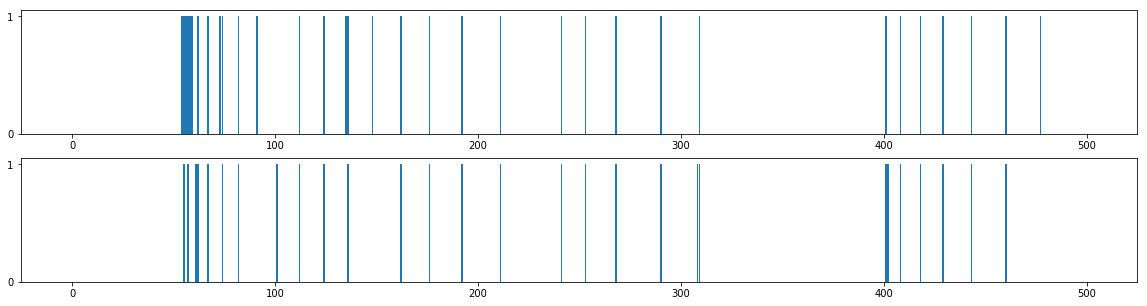

In [6]:
print ("Binned Spike Train1: {}".format(BinnedSpikeTrain1))
print ("Binned Spike Train2: {}".format(BinnedSpikeTrain2))
fig, (ax1,ax2) = plt.subplots(nrows = 2, figsize = (20,5))
#plt.figure(figsize=(5,15))
x1 = np.arange(np.size(BinnedSpikeTrain1))
print (x1)
x2 = np.arange(np.size(BinnedSpikeTrain2))
ax1.bar(x1,BinnedSpikeTrain1)
ax1.yaxis.set_major_locator(MaxNLocator(integer = True))
ax2.bar(x2,BinnedSpikeTrain2, lw = 3)
ax2.yaxis.set_major_locator(MaxNLocator(integer = True))
plt.show()

In [7]:
#Lets do correlation analysis now. 
#AutoCorrelation = np.correlate(BinnedSpikeTrain, BinnedSpikeTrain, mode = 'valid')
#print ("Correlation Values: {}".format(AutoCorrelation))

In [8]:
#AutoCorrelation = np.correlate(BinnedSpikeTrain, BinnedSpikeTrain, mode = 'full')
#print ("Correlation Values: {}".format(AutoCorrelation))

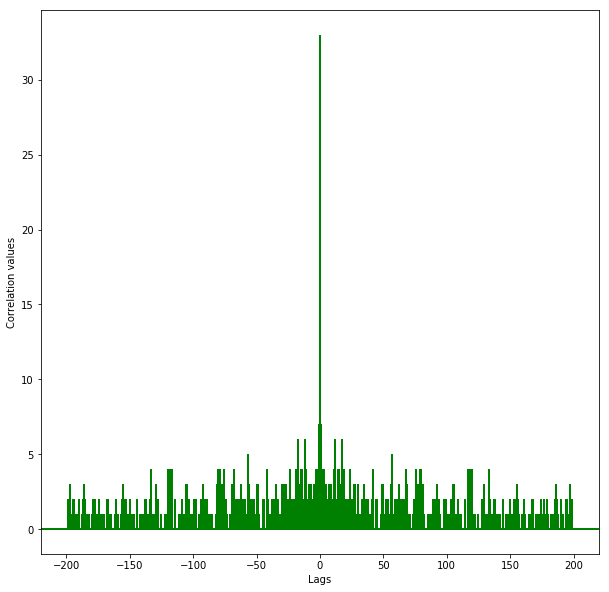

In [9]:
#plt.plot(AutoCorrelation)
#plt.show()
###############################
#Autocorrelation plot for spiketrain1 
plt.figure(figsize = (10,10))
plt.acorr(BinnedSpikeTrain1, usevlines = True, normed = False, maxlags = 200, lw = 2,color = 'g')
plt.xlabel("Lags")
plt.ylabel("Correlation values")
plt.show()

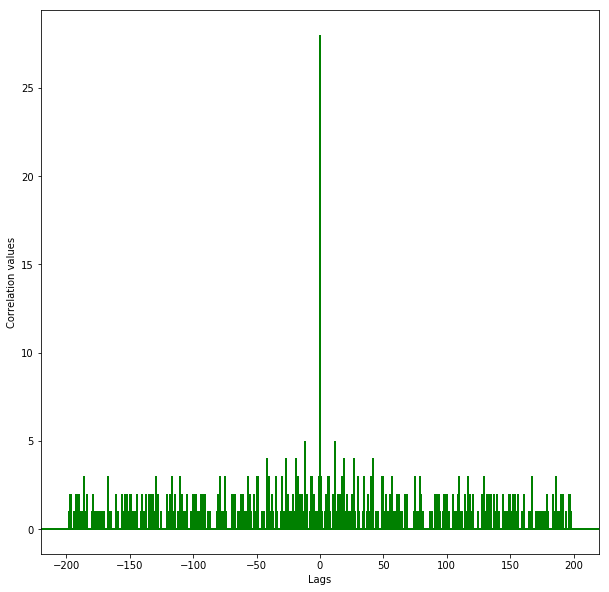

In [10]:
#Autocorrelation plot for spiketrain2 
plt.figure(figsize = (10,10))
plt.acorr(BinnedSpikeTrain2, usevlines = True, normed = False, maxlags = 200, lw = 2,color = 'g')
plt.xlabel("Lags")
plt.ylabel("Correlation values")
plt.show()

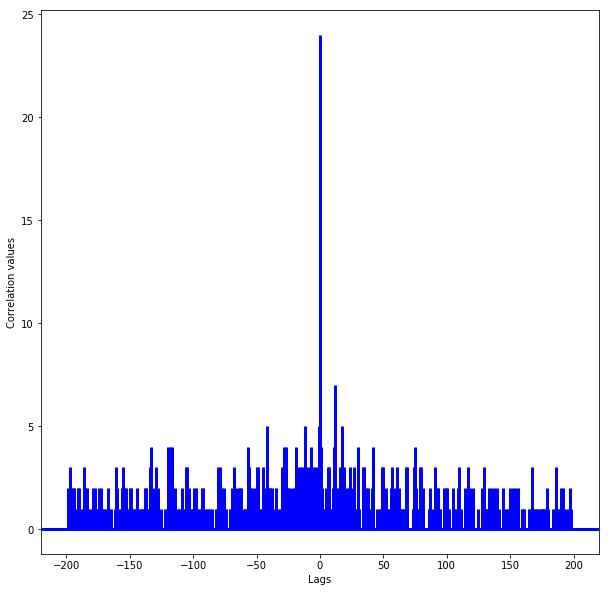

In [11]:
#crosscorrelation between spiketrain1 and spiketrain2 
plt.figure(figsize = (10,10))
plt.xcorr(BinnedSpikeTrain1, BinnedSpikeTrain2, usevlines = True, normed = False, maxlags = 200, lw = 3,color = 'b')
plt.xlabel("Lags")
plt.ylabel("Correlation values")
plt.show()

In [12]:
##########################
#Some PSTH stuff, trying
binSize = 20
binarySpikeTrain1, PSTH1, noOfBins = st.PSTH(spiketrain1,binSize)
binarySpikeTrain2, PSTH2, noOfBIns = st.PSTH(spiketrain2,binSize)

no of data points: 5000
array shape: (5000,)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
no of data points: 5000
array shape: (5000,)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


[ 0.  0.  0. ...,  0.  0.  0.]


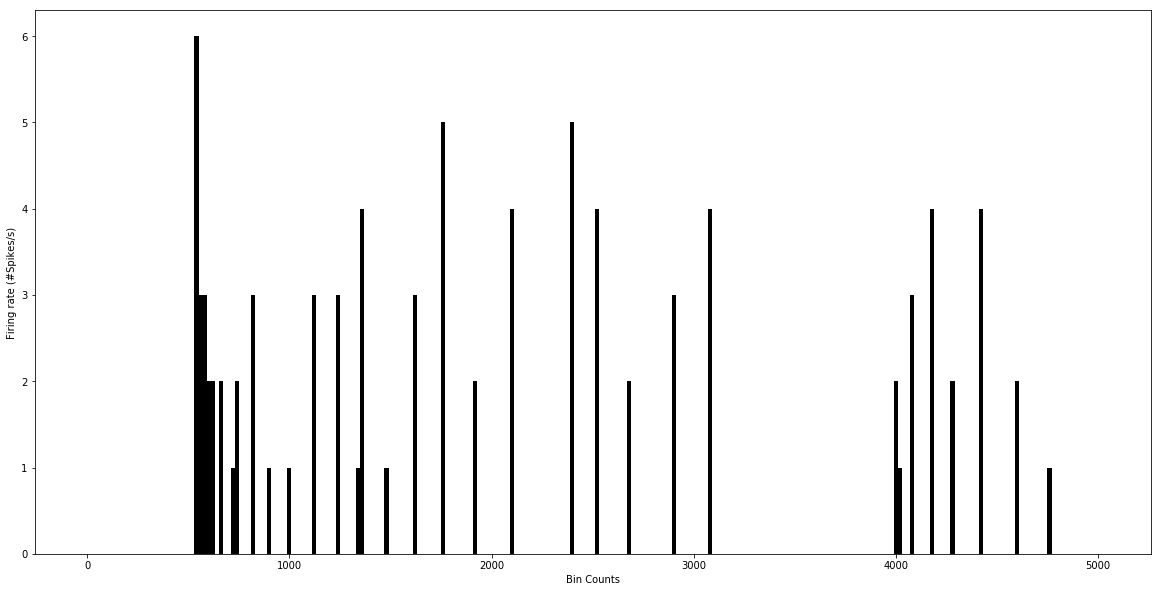

In [13]:
print (PSTH1 + PSTH2)
PSTH = PSTH1 + PSTH2
#the x axis will have binning of 1 ms. 
# shows the same time line as real spike train. 
x = np.arange(np.size(PSTH))
plt.figure(figsize = (20,10))
plt.bar(x,PSTH, width = binSize, color = 'k')
plt.xlabel("Bin Counts")
plt.ylabel("Firing rate (#Spikes/s)")
plt.show()


In [14]:
#ISI Histogram plots..
ISI_distances = [] # empty list
spiketrain = [] # empty spike train list, this will be filled with spike trains read from a file
SpikeFile = 'SpikeTrains/final_interpolated.txt' # hippocampal spike trains from 4096 channels recorded with 3Brain Biocam

In [15]:
#error handling 
try:
    with open(SpikeFile) as f: # the file contains spike times for each channel in a line separated with a space
        lines = f.readlines()
        for line in lines:
            spiketrain.append(np.fromstring(line, dtype = float, sep = ' '))
    #sanity check
    print("spike train list is : {}, The shape is {}, elements in each row is {}".format(spiketrain,len(spiketrain), len(spiketrain[2])))

except:
    print ("File not found !!!!")
    

spike train list is : [array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([-1.]), array([ 3822.]), array([-1.]), array([-1.]), array([  537.,  4074.]), array([ 4075.,  4176.]), array([-1.]), array([-1.]), array([ 2693.]), array([ 4020.,  4091.]), array([  560.,   596.,   627.,   629.,   677.,   828.,  1018.,  1928.,
        2420.,  2908.,  4020.,  4091.]), array([  544.,   555.,   560.,   596.,   627.,   675.,   677.,  1018.,
        1120.,  1243.,  1491.,  1761.,  1925.,  2113.,  2416.,  2420.,
        2535.,  2538.,  4015.,  4018.,  4019.,  4183.,  4294.,  4296.,
        4437.,  4439.,  4599.,  4601.,  4769.,  4773.]), array([  544.,   549.,   551.,   552.,   555.,   570.,   584.,   675.,
         677.,   745.,   913.,  1015.

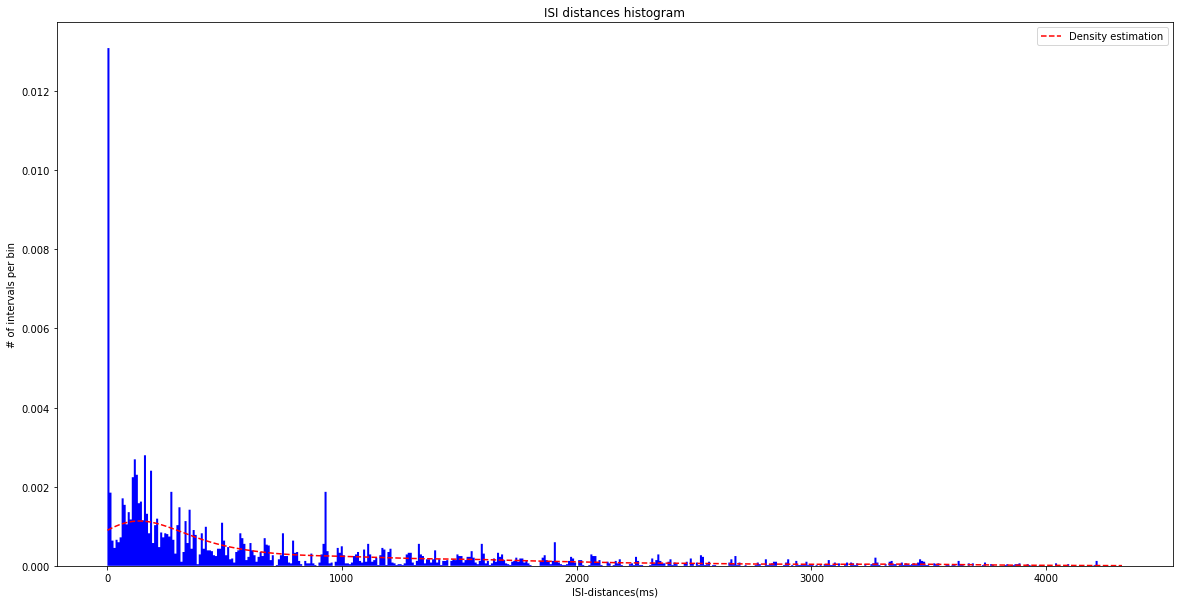

In [16]:
#Now pluggin the spike train list to a ISI_multi function which counts calculates isi distances 
#and returns a list of isi distances

ISI_distances = st.ISI_multi(spiketrain)
#now lets plot
st.plot_ISIH(ISI_distances, 500)